Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date  Product  UnitsSold  Revenue
0  2024-01-01    Phone         26    43188
1  2024-01-02    Phone         85    32755
2  2024-01-03   Laptop         11     5579
3  2024-01-04  Monitor         61    28188
4  2024-01-05  Monitor         64    15223


<Figure size 1000x600 with 0 Axes>

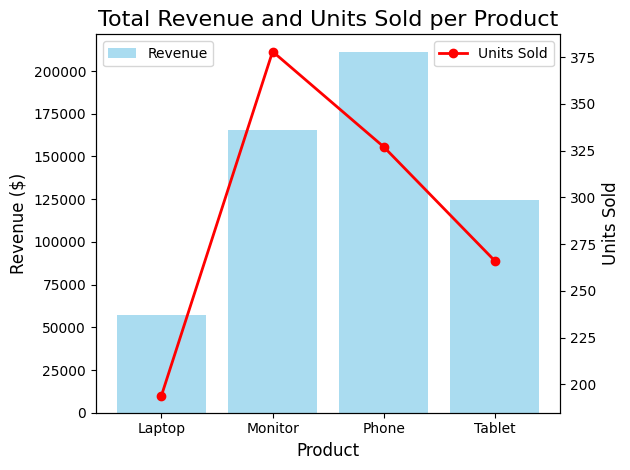

<Figure size 1000x600 with 0 Axes>

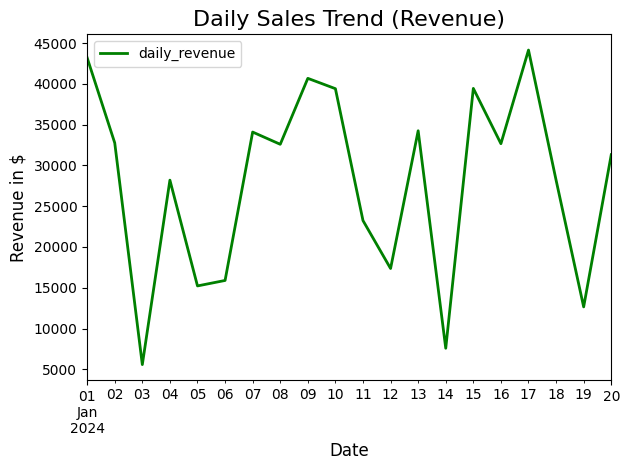

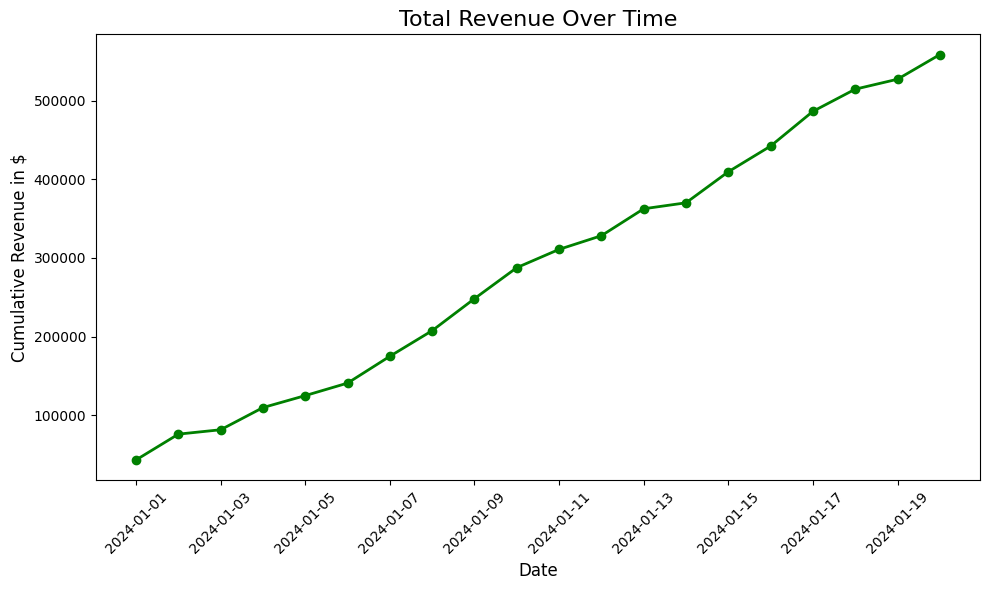

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read data from the CSV file located in Google Drive
df = pd.read_csv('/content/drive/MyDrive/sales_data.csv')

# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month_name()

# Extract the year from the 'Date' column (in case we have data from multiple years)
df['Year'] = df['Date'].dt.year

# Group by 'Product' to get total revenue and units sold per product
product_sales = df.groupby('Product').agg(
    total_revenue=('Revenue', 'sum'),
    total_units_sold=('UnitsSold', 'sum')
).reset_index()

# Plotting

# 1. Product-wise Total Revenue and Units Sold
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # Create a second y-axis for units sold
ax1.bar(product_sales['Product'], product_sales['total_revenue'], color='skyblue', alpha=0.7, label='Revenue')
ax2.plot(product_sales['Product'], product_sales['total_units_sold'], color='red', marker='o', label='Units Sold', linestyle='-', linewidth=2)

# Adding titles and labels
ax1.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax2.set_ylabel('Units Sold', fontsize=12)

# Adding a title and legend
plt.title('Total Revenue and Units Sold per Product', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Daily Sales Trend (Revenue over Time)
plt.figure(figsize=(10, 6))
df.groupby('Date').agg(daily_revenue=('Revenue', 'sum')).plot(kind='line', color='green', linewidth=2)
plt.title('Daily Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue in $', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Total Revenue Over Time (Cumulative Revenue)
daily_revenue = df.groupby('Date').agg(daily_revenue=('Revenue', 'sum')).reset_index()

# Calculate cumulative revenue over time
daily_revenue['Cumulative Revenue'] = daily_revenue['daily_revenue'].cumsum()

# Plotting Total Revenue Over Time (Cumulative Revenue)
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Cumulative Revenue'], color='green', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Total Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Revenue in $', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
